# Accuracy=99.75% using 25 Million Training Images!!
Thật đáng kinh ngạc khi mạng lưới thần kinh tích chập (CNN) có thể phân loại các chữ số viết tay với độ chính xác cao như vậy. Trong ví dụ này, nhóm chúng tôi sẽ chứng kiến một nhóm gồm 15 CNN phân loại các chữ số MNIST của Kaggle sau khi huấn luyện trên 42.000 hình ảnh từ "train.csv" của Kaggle và 25 triệu hình ảnh khác được tạo bằng cách xoay, chia tỷ lệ và dịch chuyển các hình ảnh của Kaggle. Với tổng cộng 25.042.000 hình ảnh huấn luyện, nhóm CNN này đạt được độ chính xác phân loại lên tới 99,75%. Ví dụ này sử dụng các ý tưởng từ những mô hình đã được công bố tốt nhất trên internet. Các kỹ thuật nâng cao bao gồm tăng cường dữ liệu, các lớp tích chập phi tuyến tính, các lớp tổng hợp có thể học được, kích hoạt ReLU, tập hợp, đóng gói, tốc độ học tập phân rã, bỏ học, chuẩn hóa hàng loạt và tối ưu hóa adam.
# LOAD LIBRARIES
nhập cấu trúc dưới dạng pd
nhập numpy dưới dạng np
từ sklearn.model_selection nhập train_test_split
từ keras.utils.np_utils nhập vào_categorical
từ keras.models nhập tuần tự
từ keras.layers nhập Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
từ keras.preprocessing.image nhập ImageDataGenerator
từ keras.callbacks nhập LearningRateScheduler

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Load Kaggle's 42,000 training images

In [33]:
# LOAD THE DATA
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [34]:
# PREPARE DATA FOR NEURAL NETWORK
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

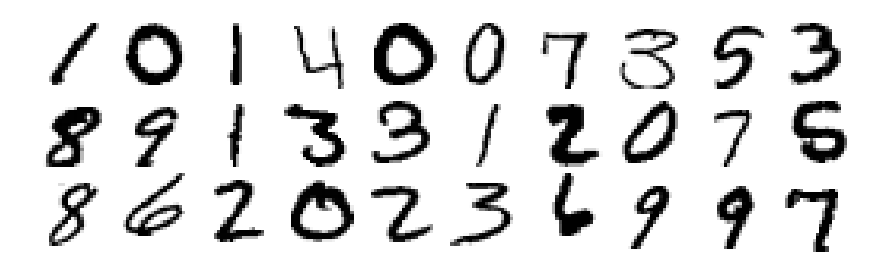

In [35]:
import matplotlib.pyplot as plt
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

# Generate 25 million more images!!
bằng cách xoay, chia tỷ lệ và dịch chuyển ngẫu nhiên 42.000 hình ảnh của Kaggle.

In [36]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION(TẠO THÊM HÌNH ẢNH QUA TĂNG CƯỜNG DỮ LIỆU)
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

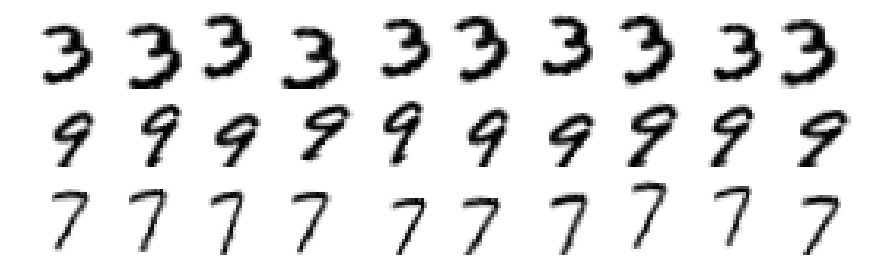

In [37]:
# PREVIEW AUGMENTED IMAGES(XEM TRƯỚC HÌNH ẢNH TĂNG CƯỜNG)
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

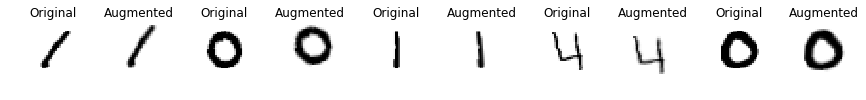

In [38]:
# Visualize augmented images (hiển thị các hình ảnh đã được tăng cường)
X_sample = X_train[:5]  # Lấy 5 hình ảnh đầu tiên làm ví dụ
plt.figure(figsize=(15, 6))
for i in range(5):
    # Hình ảnh gốc
    plt.subplot(5, 10, i * 2 + 1)
    plt.imshow(X_sample[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Original')
    plt.axis('off')
    
    # Hình ảnh đã được tăng cường
    X_augmented = datagen.flow(X_sample[i].reshape(1, 28, 28, 1), batch_size=1).next()
    plt.subplot(5, 10, i * 2 + 2)
    plt.imshow(X_augmented[0].reshape(28, 28), cmap=plt.cm.binary)
    plt.title('Augmented')
    plt.axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


# Build 15 Convolutional Neural Networks!

In [39]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 15
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1))) #Lớp tích chập 32 bộ lọc
    model[j].add(BatchNormalization()) #Lớp chuẩn hóa giúp tăng tốc độ huấn luyện và ổn định mô hình.
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten()) #Chuyển đổi tensor thành vector phẳng để đưa vào lớp Dense.
    model[j].add(Dropout(0.4)) #Lớp Dropout với tỷ lệ dropout là 40% giúp giảm overfitting
    model[j].add(Dense(10, activation='softmax')) #

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST(BIÊN SOẠN VỚI TỐI ƯU HÓA ADAM VÀ CHI PHÍ ENTROPY CHÉO)
    #ReLU: Hàm kích hoạt phi tuyến đơn giản, giúp giảm vấn đề gradient biến mất và tăng tốc độ tính toán.
    #Same Padding: Kỹ thuật padding giữ nguyên kích thước đầu ra so với đầu vào trong các lớp tích chập.
    #Softmax: Hàm kích hoạt chuyển đổi đầu ra thành xác suất, hữu ích cho các bài toán phân loại đa lớp.
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Điểm nổi bật về kiến ​​trúc
![](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/2020/LeNet5.png)

Các CNN trong hạt nhân này tuân theo thiết kế của [LeNet5] [1] (hình trên) với những cải tiến sau:  
* Hai bộ lọc 3x3 xếp chồng lên nhau thay thế các bộ lọc 5x5 đơn lẻ. Chúng trở thành các tích chập 5x5 phi tuyến
* Tích chập với bước 2 thay thế các lớp gộp. Chúng trở thành các lớp tổng hợp có thể học được.
* Kích hoạt ReLU thay thế sigmoid.
* Chuẩn hóa hàng loạt được thêm vào
* Bỏ học được thêm vào
* Nhiều bản đồ tính năng (kênh) được thêm vào
* Một nhóm gồm 15 CNN có đóng bao được sử dụng  
  
Các thử nghiệm [(ở đây)][2] cho thấy rằng mỗi thay đổi này đều cải thiện độ chính xác của phân loại.

[1]:http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf
[2]:https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

# Train 15 CNNs

# Ensemble 15 CNN predictions and submit

In [40]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 45
for j in range(nets):
    X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.1)
    history[j] = model[j].fit_generator(datagen.flow(X_train2,Y_train2, batch_size=64),
        epochs = epochs, steps_per_epoch = X_train2.shape[0]//64,  
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

CNN 1: Epochs=45, Train accuracy=0.99626, Validation accuracy=0.99643
CNN 2: Epochs=45, Train accuracy=0.99653, Validation accuracy=0.99548
CNN 3: Epochs=45, Train accuracy=0.99666, Validation accuracy=0.99690
CNN 4: Epochs=45, Train accuracy=0.99600, Validation accuracy=0.99714
CNN 5: Epochs=45, Train accuracy=0.99642, Validation accuracy=0.99643
CNN 6: Epochs=45, Train accuracy=0.99621, Validation accuracy=0.99667
CNN 7: Epochs=45, Train accuracy=0.99613, Validation accuracy=0.99667
CNN 8: Epochs=45, Train accuracy=0.99642, Validation accuracy=0.99476
CNN 9: Epochs=45, Train accuracy=0.99671, Validation accuracy=0.99714
CNN 10: Epochs=45, Train accuracy=0.99616, Validation accuracy=0.99690
CNN 11: Epochs=45, Train accuracy=0.99624, Validation accuracy=0.99643
CNN 12: Epochs=45, Train accuracy=0.99618, Validation accuracy=0.99690
CNN 13: Epochs=45, Train accuracy=0.99629, Validation accuracy=0.99548
CNN 14: Epochs=45, Train accuracy=0.99632, Validation accuracy=0.99714
CNN 15: Epochs=

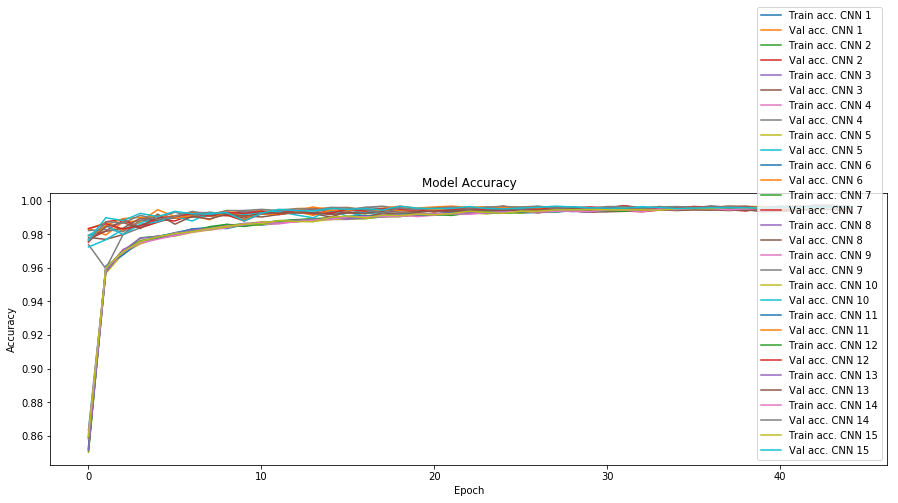

In [42]:
# Visualize training and validation accuracy (hiển thị độ chính xác huấn luyện và kiểm tra)
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['acc'], label='Train acc. CNN {0:d}'.format(i + 1))
    plt.plot(history[i].history['val_acc'], label='Val acc. CNN {0:d}'.format(i + 1))
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

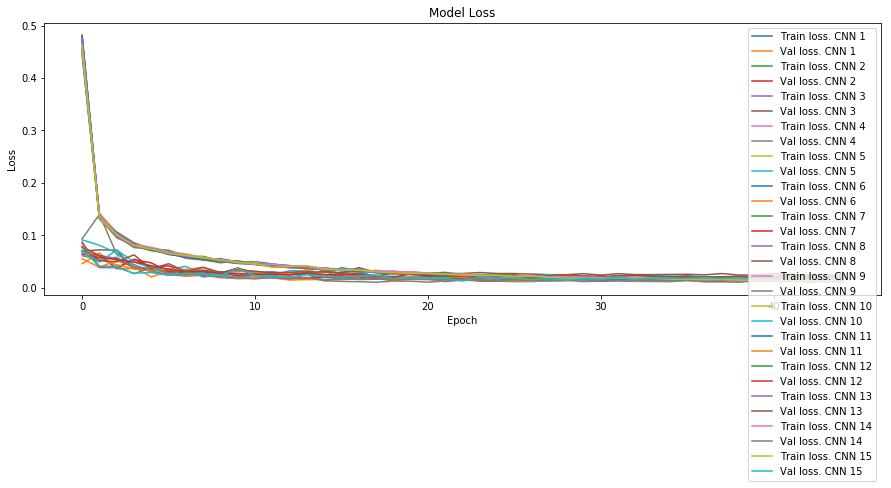

In [43]:
# Visualize training and validation loss (hiển thị mất mát huấn luyện và kiểm tra)
plt.figure(figsize=(15, 5))
for i in range(nets):
    plt.plot(history[i].history['loss'], label='Train loss. CNN {0:d}'.format(i + 1))
    plt.plot(history[i].history['val_loss'], label='Val loss. CNN {0:d}'.format(i + 1))
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [44]:
# ENSEMBLE PREDICTIONS AND SUBMIT
results = np.zeros( (X_test.shape[0],10) ) 
for j in range(nets):
    results = results + model[j].predict(X_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("MNIST-CNN-ENSEMBLE.csv",index=False)

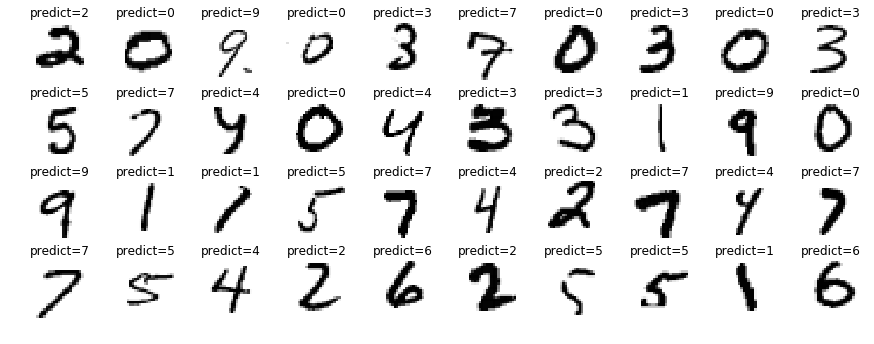

In [46]:
# PREVIEW PREDICTIONS(XEM TRƯỚC DỰ ĐOÁN)
plt.figure(figsize=(15,6))
for i in range(40):  
    plt.subplot(4, 10, i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.title("predict=%d" % results[i],y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

# Result

Ồ, thật ngạc nhiên khi mạng nơ-ron tích chập có thể phân loại các chữ số viết tay một cách chính xác đến vậy; 99,75% là mức con người có thể phân loại được!! Nhóm gồm 15 CNN này đã được đào tạo với 42.000 hình ảnh "train.csv" của Kaggle cùng với 25 triệu hình ảnh khác được tạo bằng cách xoay, chia tỷ lệ và dịch chuyển các hình ảnh "train.csv" của Kaggle.

# How well can a human classify? (Con người có thể phân loại tốt đến mức nào?)
Hãy làm Test. Dưới đây là 50 hình ảnh khó nhất từ ​​"test.csv" của Kaggle. Đối với mỗi hình ảnh, hãy viết ra một dự đoán về chữ số đó. Sau đó nhấp vào liên kết bên dưới để xem câu trả lời đúng. Gợi ý: Không có gì ở hàng dưới cùng trông giống như vậy và 4 hàng trên cùng chứa 9 chữ số khác nhau!! 
    
![quiz](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/2020/unknown.png)  
  
  
Nhấp vào [đây] [1] để xem câu trả lời. Sự mơ hồ và/hoặc gắn nhãn sai của một số hình ảnh nhất định là lý do khiến bộ phân loại không thể đạt được độ chính xác lớn hơn 99,8%. Nói một cách đại khái, độ chính xác tổng thể của bạn trên toàn bộ tập dữ liệu kiểm tra MNIST sẽ bằng 100% trừ 0,01% số lượng bạn đã sai trong bài kiểm tra này.

[1]:http://playagricola.com/Kaggle/answers.png

# CNN Performance( Hiệu suất)
Làm thế nào chúng ta có thể đánh giá hiệu suất của mạng lưới thần kinh? Mạng nơ-ron đã được huấn luyện sẽ hoạt động khác nhau mỗi khi bạn huấn luyện nó vì các trọng số được khởi tạo ngẫu nhiên. Do đó, để đánh giá hiệu suất của mạng nơ-ron, chúng ta phải huấn luyện nó nhiều lần và lấy độ chính xác trung bình. Nhóm trong cuốn sổ này đã được đào tạo và đánh giá 100 lần!! (trên tập dữ liệu MNIST ban đầu có mức phân chia 60k/10k bằng cách sử dụng mẫu mã [tại đây] [1] trên GitHub.) Dưới đây là biểu đồ về độ chính xác của nó.  
  
Độ chính xác tối đa của một CNN riêng lẻ là 99,81% với độ chính xác trung bình là 99,641% và độ lệch chuẩn 0,047. Độ chính xác tối đa của một tập hợp gồm 15 CNN là 99,79% với độ chính xác trung bình là 99,745% và độ lệch chuẩn 0,020.
  
![hist](https://raw.githubusercontent.com/cdeotte/Kaggle_Images/main/2020/histBoth5.png)

## Data augmentation hyper-parameters( Siêu tham số tăng cường dữ liệu)
Để xác định các siêu tham số tốt nhất cho việc tăng cường dữ liệu, tìm kiếm dạng lưới đã được sử dụng. Dưới đây là độ chính xác của một tập hợp (trong số 15 CNN) với nhiều cài đặt tăng cường dữ liệu khác nhau. Các cột là `xoay` và `thu phóng`. Các hàng là `w_shift` và `h_shift`. Ví dụ: hàng 2, cột 4 là `r = 15, z = 0,15, w = 0,1, h = 0,1`. Mỗi ô là giá trị trung bình của 6 lần thử:
  
            0      5     10      15     20     25     30  
    0     99.70  99.70  99.70  99.70  99.69  99.65  99.62
    0.1   99.73  99.73  99.75  99.75  99.72  99.67  99.64 
    0.2                 99.72  99.72

Dưới đây là độ chính xác của một CNN với nhiều cài đặt tăng cường dữ liệu khác nhau. Mỗi ô là trung bình của 30 thử nghiệm.  
            0      5     10      15     20     25     30  
    0     99.57  99.58  99.62  99.62  99.62  99.57  99.52
    0.1   99.62  99.63  99.65  99.65  99.63  99.58  99.52  
    0.2                 99.62  99.62
  
Cuối cùng, tôi đã tính toán phương sai của các hình ảnh huấn luyện MNIST. Trung tâm trung bình tính bằng pixel = (14,9, 15,2). Độ lệch chuẩn của tâm tính bằng pixel = (0,99, 1,34). Điều đó có nghĩa là cài đặt `w_shift = 0,07` cùng với `h_shift = 0,09` chứa 95% tâm. Phân tích tương tự cho thấy rằng cài đặt `rotation_range = 13` cùng với `zoom_range = 0,13` chứa 95% hình ảnh.

Dựa trên phân tích này, các cài đặt `rotation_range = 10, zoom_range = 0,10, w_shift = 0,1 và h_shift = 0,1` đã được chọn.

[1]:https://github.com/cdeotte/MNIST-CNN-99.75

In [ ]:
# Lưu trọng số và cấu trúc mô hình
for j in range(nets):
    model[j].save_weights("model_{}.h5".format(j))  # Lưu trọng số
    with open("model_{}.json".format(j), "w") as json_file:  # Lưu cấu trúc mô hình
        json_file.write(model[j].to_json())

